<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/band3_rad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

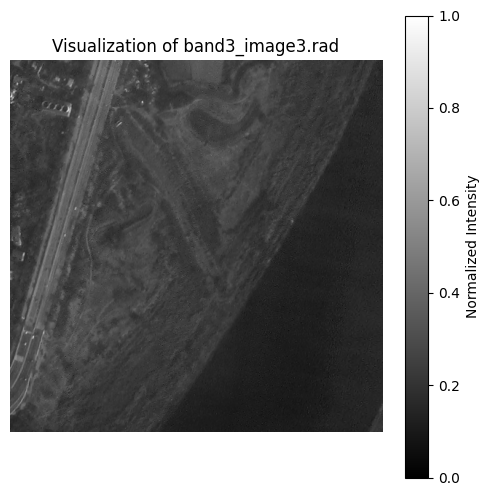

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load .rad file as binary float16 array (assuming 2 bytes per pixel)
rad_path = "/content/band3_image3.rad"
image_data = np.fromfile(rad_path, dtype=np.float16) # Changed dtype to float16

# Reshape (you must know the correct dimensions; adjust if different)
height, width = 512, 512  # Update if needed
image_data = image_data.reshape((height, width))

# Normalize for display (0 to 1)
image_data_norm = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))

# Display using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_data_norm, cmap='gray')
plt.title("Visualization of band3_image3.rad")
plt.axis('off')
plt.colorbar(label='Normalized Intensity')
plt.show()

In [3]:
pip install opencv-python scikit-image matplotlib numpy


PSNR - Gaussian Blur: 42.61
PSNR - Median Filter: 40.17
PSNR - Bilateral Filter: 39.26
PSNR - Non-Local Means: 55.62
PSNR - Total Variation: 39.22


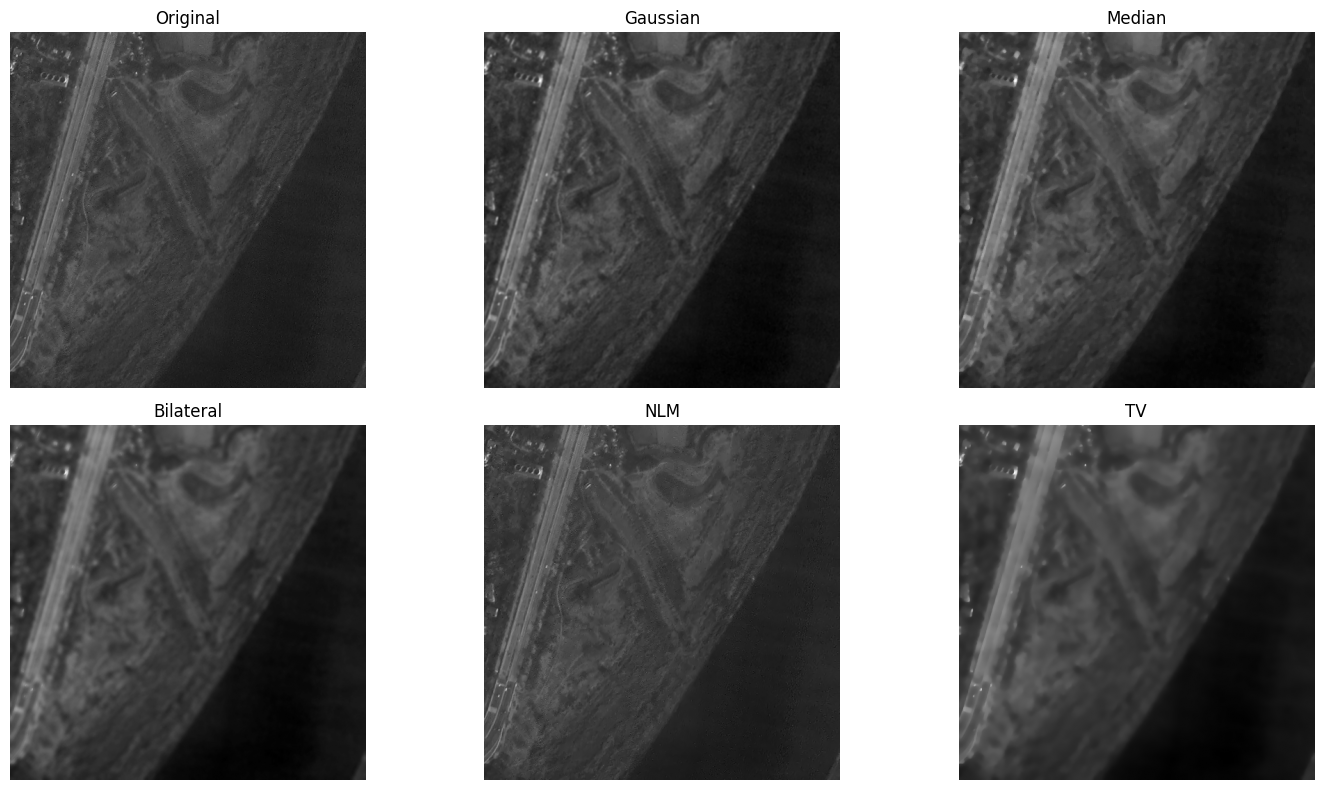

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.restoration import denoise_nl_means, estimate_sigma, denoise_tv_chambolle
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the normalized image (assuming you've loaded it as `image`)
# Use np.loadtxt for .rad file
image = np.fromfile('/content/band3_image3.rad', dtype=np.float16).reshape((512, 512))
image = image.astype(np.float32) # Convert to float32 for OpenCV
image = cv2.normalize(image, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# 1. Gaussian Blur
gaussian = cv2.GaussianBlur(image, (5, 5), 1)
psnr_gaussian = psnr(image, gaussian)

# 2. Median Filter
# Convert to uint8 for medianBlur, then back to float32 and normalize for PSNR
median = cv2.medianBlur((image * 255).astype(np.uint8), 5).astype(np.float32) / 255.0
psnr_median = psnr(image, median)

# 3. Bilateral Filter
# Convert to uint8 for bilateralFilter, then back to float32 and normalize for PSNR
bilateral = cv2.bilateralFilter((image * 255).astype(np.uint8), d=9, sigmaColor=75, sigmaSpace=75).astype(np.float32) / 255.0
psnr_bilateral = psnr(image, bilateral)

# 4. Non-Local Means Denoising
sigma_est = np.mean(estimate_sigma(image, channel_axis=None))
nlm = denoise_nl_means(image, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3, channel_axis=None)
psnr_nlm = psnr(image, nlm)

# 5. Total Variation Denoising
tv = denoise_tv_chambolle(image, weight=0.1)
psnr_tv = psnr(image, tv)

# Print PSNR scores
print(f"PSNR - Gaussian Blur: {psnr_gaussian:.2f}")
print(f"PSNR - Median Filter: {psnr_median:.2f}")
print(f"PSNR - Bilateral Filter: {psnr_bilateral:.2f}")
print(f"PSNR - Non-Local Means: {psnr_nlm:.2f}")
print(f"PSNR - Total Variation: {psnr_tv:.2f}")

# Plot results
titles = ['Original', 'Gaussian', 'Median', 'Bilateral', 'NLM', 'TV']
images = [image, gaussian, median, bilateral, nlm, tv]

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()